# Installs

In [14]:
# pip install opencv-python
# !pip install ultralytics
# !pip install wandb

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------- ----------------------------- 3.9/15.5 MB 19.6 MB/s eta 0:00:01
   --------------------- ------------------ 8.1/15.5 MB 21.0 MB/s eta 0:00:01
   ---------------------------------- ----- 13.4/15.5 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 21.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries (custom)

In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [1]:
import os
import re
import cv2
import yaml
import glob
import random
import requests
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display, Image
from IPython import display
display.clear_output()
import seaborn as sns
from io import BytesIO
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import IPython.display as display
from matplotlib.patches import Rectangle
! wandb disabled

W&B disabled.


# Class, parameters, paths (needs edits)

To adjust YOLO hyperparameters, you can modify the values within a configuration file (usually a YAML file) that defines parameters like learning rate, batch size, epochs, data augmentation settings, and more, and then retrain your YOLO model with the updated settings; for advanced tuning, you can use automated hyperparameter tuning techniques like grid search or evolutionary algorithms to systematically explore different combinations of hyperparameters and find the optimal settings for your specific dataset and task. 


Key points about adjusting YOLO hyperparameters:
Access the configuration file:
Most YOLO implementations, like Ultralytics YOLO, allow you to modify hyperparameters through a YAML configuration file where you can directly change values for different parameters. 
Important hyperparameters to adjust:
Learning rate (lr0): Controls how quickly the model updates its weights during training. 
Batch size: Number of images processed in a single training iteration. 
Epochs: The number of times the entire training dataset is iterated through. 
Data augmentation techniques: Operations like random cropping, flipping, or color jittering to increase training data diversity. 
Optimizer settings: Parameters related to the optimization algorithm used (e.g., Adam, SGD). 
Hyperparameter tuning methods:
Grid search: Test all combinations of hyperparameters within a predefined range. 
Random search: Randomly sample combinations of hyperparameters within a defined range. 
Evolutionary algorithms: Iteratively "evolve" hyperparameters by mutating them based on performance. 
How to adjust YOLO hyperparameters using Ultralytics YOLO:
Load the model: Import the YOLO model from the Ultralytics library. 
Access the configuration file: Specify the path to your YAML configuration file containing the desired hyperparameters. 
Modify hyperparameters: Change the values of specific hyperparameters within the YAML file. 
Train the model: Run the training command with the updated configuration file. 
Evaluate performance: Monitor training metrics like mAP (mean Average Precision) to assess the impact of hyperparameter changes. 
Important considerations:
Start with default settings:
Begin with the default hyperparameters provided by your YOLO implementation and gradually adjust based on your dataset and task. 
Validate on a separate set:
Always evaluate your model performance on a held-out validation set to avoid overfitting. 
Experiment with different combinations:
Try different combinations of hyperparameters to find the best configuration for your specific problem. 
Ultralytics YOLO Hyperparameter Tuning Guide
To optimize the learning rate for Ultralytics YOLO, start by setting an initial learning rate using the lr0 parameter. Common valu...

Ultralytics
changing Yolov8 hyperparameters · Issue #3491 · ultralytics ...
Jul 2, 2023 — To modify the hyperparameters, you need to make the changes in the default. yaml file. However, please note that your c...

GitHub
Configuration - Ultralytics YOLO Docs
Validation Settings ... These settings influence the model's performance, speed, and accuracy. Common YOLO validation settings inc...

Ultralytics
Show all


In [ ]:
class CFG:
    DEBUG = False
    FRACTION = 0.05 if DEBUG else 1.0
    SEED = 88

    # classes
    CLASSES = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask',
               'NO-Safety Vest', 'Person', 'Safety Cone',
               'Safety Vest', 'machinery', 'vehicle']
    NUM_CLASSES_TO_TRAIN = len(CLASSES)

    # training
    EPOCHS = 3 if DEBUG else 100
    BATCH_SIZE = 16
    
    BASE_MODEL = 'yolov8x' # yolov8n, yolov8s, yolov8m, yolov8l, yolov8x
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'
    
    OPTIMIZER = 'auto' # SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto
    LR = 1e-3
    LR_FACTOR = 0.01
    WEIGHT_DECAY = 5e-4
    DROPOUT = 0.0
    PATIENCE = 20
    PROFILE = False
    LABEL_SMOOTHING = 0.0    

    # paths
    CUSTOM_DATASET_DIR = '/kaggle/input/construction-site-safety-image-dataset-roboflow/css-data/'
    OUTPUT_DIR = './'
dict_file = {
    'train': os.path.join(CFG.CUSTOM_DATASET_DIR, 'train'),
    'val': os.path.join(CFG.CUSTOM_DATASET_DIR, 'valid'),
    'test': os.path.join(CFG.CUSTOM_DATASET_DIR, 'test'),
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
    }

with open(os.path.join(CFG.OUTPUT_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)
### read yaml file created
def read_yaml_file(file_path = CFG.CUSTOM_DATASET_DIR):
    with open(file_path, 'r') as file:
        try:
            data = yaml.safe_load(file)
            return data
        except yaml.YAMLError as e:
            print("Error reading YAML:", e)
            return None

### print it with newlines
def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

file_path = os.path.join(CFG.OUTPUT_DIR, 'data.yaml')
yaml_data = read_yaml_file(file_path)

if yaml_data:
    print_yaml_data(yaml_data)


# custom datadet

In [8]:
dataset = 'Github/aai-501-final-project_dv/ppe_custom'

In [ ]:
!yolo task=detect mode=detect model=yolov8s.pt source='ppe_custom/images/scene1_all_1.jpg'  epochs=30 imgsz=640

In [18]:
!yolo task=detect mode=predict model=yolov8s.pt source='ppe_custom/images/scene1_all_1.jpg'  epochs=30 imgsz=640

Ultralytics 8.3.32 ðŸš€ Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i9-14900KF)
YOLOv8s summary (fused): 168 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\ppe_custom\images\scene1_all_1.jpg: 640x640 1 person, 3 bottles, 1 cup, 2 couchs, 1 dining table, 1 remote, 2 refrigerators, 4 books, 97.4ms
Speed: 2.3ms preprocess, 97.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


# Train Custom

In [5]:
model = YOLO('yolov8n.pt')
model.train(data='data.yaml', epochs=30)

Ultralytics 8.3.32  Python-3.12.4 torch-2.5.1+cpu CPU (Intel Core(TM) i9-14900KF)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\train\labels... 26

train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\train\images\-1670-_png_jpg.rf.7da967f9aeaa62defc36543b9e6000af.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\train\images\-1670-_png_jpg.rf.b42b26d784545ce1a033679674a4f3e5.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\train\images\-1670-_png_jpg.rf.dd5cb0a4d6da02d34f1dc003fb4ebca6.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 7. Possible class labels are 0-6
train: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\train\images\-1680-_png_jpg.rf.175b8e375a256e36cbe84985db1d8768.jpg: ignor

train: New cache created: C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\train\labels.cache


val: Scanning C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\valid\labels... 114 

val: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\valid\images\4_jpg.rf.a937c41e1fc4d92e9e1f8c2d9efeb87d.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 7. Possible class labels are 0-6
val: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\valid\images\autox3_mp4-78_jpg.rf.dc5c00104c4cf733c2c06c820b82d338.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 7. Possible class labels are 0-6
val: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\valid\images\autox4_mp4-63_jpg.rf.b0fab4fd2c947536a122d6f2e7cca895.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 7. Possible class labels are 0-6
val: WARNING  C:\Users\DARiN\Documents\Python-JL\Github\aai-501-final-project_dv\datasets\css-data\valid\images\autox4_mp4-72_jpg.rf.5e9c1836f027bf40eb8898e68f2efdeb.jpg: ignoring corr

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train9
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/23 [00:01<?, ?it/s]


IndexError: index 7 is out of bounds for dimension 1 with size 7

In [19]:
model = YOLO('yolov8s-cls.pt')
model.predict(source='ppe_custom/images/scene1_all_1.jpg')

100%|█████████████████████████████████████████████████████████████████████████████| 12.3M/12.3M [00:02<00:00, 4.55MB/s]


FileNotFoundError: ppe_custom/images/scene1_all_1.jpg does not exist

#### Path

In [2]:
# Data Path
CUSTOM_DATASET_DIR = 'ppe_custom'
# Output to current dir
OUTPUT_DIR = './' 

#### Config class

In [3]:
# Define a configuration class to hold training and dataset parameters
class CFG:
    DEBUG = False  # Flag to enable/disable debugging mode
    FRACTION = 0.05 if DEBUG else 1.0  # Fraction of data to use (smaller for debugging)
    SEED = 88  # Random seed for reproducibility

    # List of class names for object detection
    CLASSES = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask',
               'NO-Safety Vest', 'Person', 'Safety Cone',
               'Safety Vest', 'machinery', 'vehicle']
    NUM_CLASSES_TO_TRAIN = len(CLASSES)  # Number of classes to train on

    # Training-related settings
    EPOCHS = 3 if DEBUG else 100  # Number of training epochs (fewer for debugging)
    BATCH_SIZE = 16  # Batch size for training

    BASE_MODEL = 'yolov8x'  # Base model type (e.g., YOLOv8 variants)
    BASE_MODEL_WEIGHTS = f'{BASE_MODEL}.pt'  # Filepath for model weights
    EXP_NAME = f'ppe_css_{EPOCHS}_epochs'  # Experiment name including epochs

    OPTIMIZER = 'auto'  # Optimizer type (auto selects best based on model)
    LR = 1e-3  # Initial learning rate
    LR_FACTOR = 0.01  # Factor to scale the learning rate
    WEIGHT_DECAY = 5e-4  # Weight decay for regularization
    DROPOUT = 0.0  # Dropout rate
    PATIENCE = 20  # Early stopping patience (number of epochs without improvement)
    PROFILE = False  # Enable/disable profiling
    LABEL_SMOOTHING = 0.0  # Label smoothing for training


# Convert data to YAML (custom)

In [4]:
dict_file = {
    'train': f"{CFG.CUSTOM_DATASET_DIR}train",
    'val': f"{CFG.CUSTOM_DATASET_DIR}valid",
    'test': f"{CFG.CUSTOM_DATASET_DIR}test",
    'nc': CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
}

yaml_file_path = f"{CFG.OUTPUT_DIR}data.yaml"
with open(yaml_file_path, 'w') as file:
    yaml.dump(dict_file, file)

AttributeError: type object 'CFG' has no attribute 'CUSTOM_DATASET_DIR'

# Show image from dataset (needs edits)

In [5]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):  # Check if it's a file path
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):  # Check if it's a NumPy array
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

example_image_path = 'https://uofsandiego-my.sharepoint.com/:i:/g/personal/dverduzco_sandiego_edu/EdJTnm3-Om5HtNQj1Ds3ANMBrJYuAOua3JqNlkxiM6PH4g?e=S1SY1g'
display_image(example_image_path, print_info = True, hide_axis = False)


OSError: [Errno 22] Invalid argument: 'C:\\Users\\DARiN\\Documents\\Python-JL\\Github\\aai-501-final-project_dv\\https:\\uofsandiego-my.sharepoint.com\\:i:\\g\\personal\\dverduzco_sandiego_edu\\EdJTnm3-Om5HtNQj1Ds3ANMBrJYuAOua3JqNlkxiM6PH4g?e=S1SY1g'

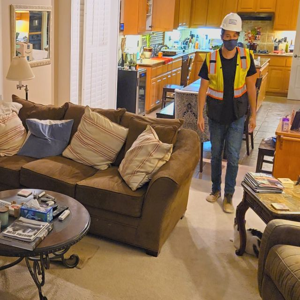

In [16]:
image = 'ppe_custom/images/scene1_all_1.jpg'
Image.open(image).resize((300,300))

# Image subplots from data path (needs edits)

In [ ]:
def plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED):
    
    random.seed(seed)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]

    # Ensure that we have at least num_images files to choose from
    if len(image_files) < num_images:
        raise ValueError("Not enough images in the folder")

    # Randomly select num_images image files
    selected_files = random.sample(image_files, num_images)

    # Create a subplot grid
    num_cols = 5
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

    for i, file_name in enumerate(selected_files):
        # Open and display the image using PIL
        img = Image.open(os.path.join(folder_path, file_name))
        
        if num_rows == 1:
            ax = axes[i % num_cols]
        else:
            ax = axes[i // num_cols, i % num_cols]
        
        ax.imshow(img)
        ax.axis('off')
        # ax.set_title(file_name)

    # Remove empty subplots
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i % num_cols])
        else:
            fig.delaxes(axes[i // num_cols, i % num_cols])

    plt.tight_layout()
    plt.show()
folder_path = CFG.CUSTOM_DATASET_DIR + 'train/images/'
plot_random_images_from_folder(folder_path, num_images=20, seed=CFG.SEED)
# plot_random_images_from_folder(folder_path, num_images=20, seed=54)

# Classes and counts (needs edits)

In [ ]:
def get_image_properties(image_path):
    # Read the image file
    img = cv2.imread(image_path)

    # Check if the image file is read successfully
    if img is None:
        raise ValueError("Could not read image file")

    # Get image properties
    properties = {
        "width": img.shape[1],
        "height": img.shape[0],
        "channels": img.shape[2] if len(img.shape) == 3 else 1,
        "dtype": img.dtype,
    }

    return properties
    
img_properties = get_image_properties(example_image_path)
img_properties




In [ ]:
%%time
class_idx = {str(i): CFG.CLASSES[i] for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

class_stat = {}
data_len = {}
class_info = []

for mode in ['train', 'valid', 'test']:
    class_count = {CFG.CLASSES[i]: 0 for i in range(CFG.NUM_CLASSES_TO_TRAIN)}

    path = os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'labels')

    for file in os.listdir(path):
        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1

    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

    class_info.append({'Mode': mode, **class_count, 'Data_Volume': data_len[mode]})

dataset_stats_df = pd.DataFrame(class_info)
dataset_stats_df

# Bar graphs for counts (needs edits)

In [ ]:
# Plot vertical bar plots for each mode in subplots
for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(
        data=dataset_stats_df[dataset_stats_df['Mode'] == mode].drop(columns='Mode'),
        orient='v',
        ax=axes[i],
        palette='Set2'
    )
    
    axes[i].set_title(f'{mode.capitalize()} Class Statistics')
    axes[i].set_xlabel('Classes')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90) 

    # Add annotations on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

# Time test (needs edits)

In [ ]:
%%time

for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:')

    img_size = 0
    for file in glob.glob(os.path.join(CFG.CUSTOM_DATASET_DIR, mode, 'images', '*')):

        image = Image.open(file)

        if image.size != img_size:
            print(f'{image.size}')
            img_size = image.size
            print('\n')

# Pre-trained Prediction check (need edit)

In [ ]:
model = YOLO(CFG.BASE_MODEL_WEIGHTS)

results = model.predict(
    source = example_image_path,

    classes = [0],
    conf = 0.30,
    device = [0,1], # inference with dual GPU
    imgsz = (img_properties['height'], img_properties['width']),

    save = True,
    save_txt = True,
    save_conf = True,
    exist_ok = True,
)
### check predictions with base model
example_image_inference_output = example_image_path.split('/')[-1]
display_image(f'/kaggle/working/runs/detect/predict/{example_image_inference_output}')


# Training (need edit)

In [ ]:
print('Model: ', CFG.BASE_MODEL_WEIGHTS)
print('Epochs: ', CFG.EPOCHS)
print('Batch: ', CFG.BATCH_SIZE)

In [ ]:
### Load pre-trained YOLO model
model = YOLO(CFG.BASE_MODEL_WEIGHTS)
%%time

### train
model.train(
    data = os.path.join(CFG.OUTPUT_DIR, 'data.yaml'),

    task = 'detect',

    imgsz = (img_properties['height'], img_properties['width']),

    epochs = CFG.EPOCHS,
    batch = CFG.BATCH_SIZE,
    optimizer = CFG.OPTIMIZER,
    lr0 = CFG.LR,
    lrf = CFG.LR_FACTOR,
    weight_decay = CFG.WEIGHT_DECAY,
    dropout = CFG.DROPOUT,
    fraction = CFG.FRACTION,
    patience = CFG.PATIENCE,
    profile = CFG.PROFILE,
    label_smoothing = CFG.LABEL_SMOOTHING,

    name = f'{CFG.BASE_MODEL}_{CFG.EXP_NAME}',
    seed = CFG.SEED,
    
    val = True,
    amp = True,    
    exist_ok = True,
    resume = False,
    device = 0,
    verbose = False,
)

In [ ]:
# Export the model
model.export(
    format = 'openvino', # openvino, onnx, engine, tflite
    imgsz = (img_properties['height'], img_properties['width']),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)


In [ ]:
results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'batch' not in i
]
results_paths

# Confidence curves, confusion matrices

In [ ]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

# Read results

In [ ]:
df = pd.read_csv(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{CFG.OUTPUT_DIR}training_log_df.csv', index=False)
df

In [ ]:
print('*'*50)
print('\nBest Training loss: ', df['train/box_loss'].min(), ', on epoch: ', df['train/box_loss'].argmin() + 1, '\n')
print('*'*50)
print('\nBest Validation loss: ', df['val/box_loss'].min(), ', on epoch: ', df['val/box_loss'].argmin() + 1, '\n')
print('*'*50)

# Plot Training vs val loss

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Training Loss', marker='o', linestyle='-')
plt.plot(df['epoch'], df['val/box_loss'], label='Validation Loss', marker='o', linestyle='-')

plt.title('Training and Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.grid(True)
plt.show()

# Validation

In [ ]:
validation_results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}runs/detect/{CFG.BASE_MODEL}_{CFG.EXP_NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)
validation 1

if len(validation_results_paths) >= 1:
    print(validation_results_paths[-1])
### check predictions or labels from a random validation batch
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path, print_info = False, hide_axis = True)